<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/Shigapov_4105_HW3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap

In [55]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
diabetes = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/diabetes.csv'
diabetesData = pd.DataFrame(pd.read_csv(diabetes))
diabetesData.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
#Seperating my columns
X = diabetesData.iloc[:, [1,2,3,4,5,6,7]].values
y = diabetesData.iloc[:, 8].values

In [57]:
#Scaling
scale = StandardScaler()
X_std = scale.fit_transform(X)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=0)

#LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#Prediction
Y_pred = classifier.predict(X_test)

#Outputs
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred))
print("F1 Score:", metrics.f1_score(y_test,Y_pred))

Accuracy: 0.8051948051948052
Precision: 0.717948717948718
Recall: 0.5957446808510638
F1 Score: 0.6511627906976744


In [58]:
#Confusion Matrix
matrix = confusion_matrix(y_test, Y_pred)
print(matrix)

[[96 11]
 [19 28]]


Text(0.5, 427.9555555555555, 'Predicted label')

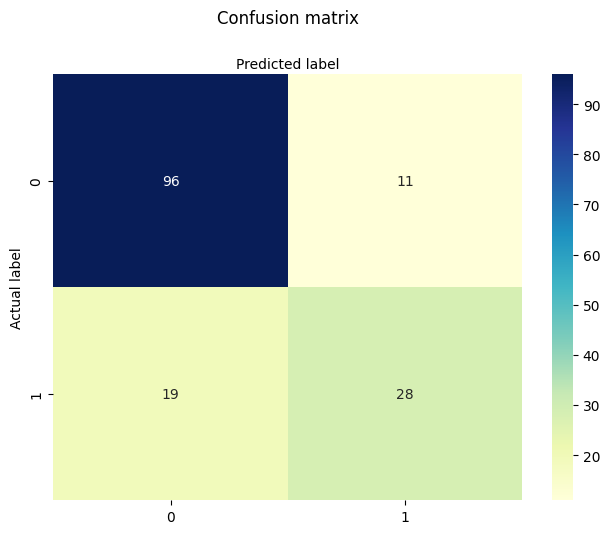

In [59]:
#Creating a heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')